# ECH - Encuesta continua de hogares 2020

## Objetivos

En esta investigación buscamos determinar cuánto afecta el nivel educativo, la cantidad de hijos y otros indicadores, a la inserción en el mercado laboral de las mujeres uruguayas. Luego de un análisis principal de la base para conocer el contexto general de la investigación, intentaremos crear un algoritmo de clasificación para entender la influencia de distintas variables categóricas en un resultado determinado.

### Librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(30,8)})

### Importar dataset y seleccionar atributos de análisis principales.

Para leer el archivo es necesario contar con la libreria _pyreadstat_

In [2]:
df = pd.read_spss('HyP_2020_Terceros.sav')

df = df.rename(columns={
    'numero': 'id_hogar',
    'e26': 'sexo',
    'e27': 'edad',
    'e563': 'genero',
    'e29_6': 'ascendencia',
    'e30': 'parentesco',
    'pobpcoac': 'estado_laboral',
    'g126_1': 'sueldo',
    'f99': 'busca_otro_trabajo',
    'f72_2': 'actividad',
    'e49_CV': 'asistencia a enseñanza',
    'e49': 'asistencia alguna vez a enseñanza',
    'e193': 'edu preescolar',
    'e197': 'edu primaria',
    'e201': 'edu media',
    'e212': 'edu técnica',
    'e215': 'edu mag prof',
    'e218': 'edu univ o simil',
    'e221': 'edu terciario no uni',
    'e224': 'edu posgrado'
    })

df = df[[
    'id_hogar', 
    'sexo', 
    'edad', 
    'genero', 
    'ascendencia', 
    'parentesco', 
    'estado_laboral', 
    'nper', 
    'sueldo', 
    'busca_otro_trabajo',
    'actividad',
    'asistencia alguna vez a enseñanza',
    'edu preescolar',
    'edu primaria',
    'edu media',
    'edu técnica',
    'edu univ o simil',
    'edu terciario no uni',
    'edu posgrado',
    'edu mag prof',
    ]]

df['nper'] = df['nper'].astype('category')
df['sexo'] = df['sexo'].astype('category')

In [3]:
df['busca_otro_trabajo'] = df['busca_otro_trabajo'].astype('str')

df = df[~df['busca_otro_trabajo'].str.contains('0.0')]

In [4]:
# for i in list(df.columns):
#     if df[i].dtype == 'object' or df[i].dtype == 'category':
#         df[i] = df[i].astype('category').cat.codes

## Primera exposición a los datos

In [5]:
df.sample(5)

,id_hogar,sexo,edad,genero,ascendencia,parentesco,estado_laboral,nper,sueldo,busca_otro_trabajo,actividad,asistencia alguna vez a enseñanza,edu preescolar,edu primaria,edu media,edu técnica,edu univ o simil,edu terciario no uni,edu posgrado,edu mag prof
117428,37289,2.0,46.0,1,2,6,10,1.0,18000.0,0,144,2,2,4,4,2,0,0,0,0
51738,17003,1.0,66.0,6,2,6,10,1.0,28000.0,0,435,2,2,4,4,2,0,0,0,0
78120,25359,2.0,48.0,1,2,1,10,2.0,0.0,0,72,2,4,4,4,2,0,0,0,0
50970,16790,2.0,43.0,1,2,1,10,2.0,0.0,0,263,2,4,4,4,4,2,2,0,2
31945,10973,1.0,22.0,6,2,3,10,3.0,25000.0,0,235,2,4,4,1,2,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63755 entries, 0 to 145163
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id_hogar                           63755 non-null  int32  
 1   sexo                               63755 non-null  float64
 2   edad                               63755 non-null  float64
 3   genero                             63755 non-null  int8   
 4   ascendencia                        63755 non-null  int8   
 5   parentesco                         63755 non-null  int8   
 6   estado_laboral                     63755 non-null  int8   
 7   nper                               63755 non-null  float64
 8   sueldo                             63755 non-null  float64
 9   busca_otro_trabajo                 63755 non-null  int8   
 10  actividad                          63755 non-null  int16  
 11  asistencia alguna vez a enseñanza  63755 non-null  in

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_hogar,63755.0,20561.058819,11935.924336,0.0,10267.0,20497.0,30917.0,41236.0
sexo,63755.0,1.481578,0.499664,1.0,1.0,1.0,2.0,2.0
edad,63755.0,43.418555,13.229642,3.0,33.0,43.0,54.0,93.0
genero,63755.0,3.590103,2.498194,1.0,1.0,6.0,6.0,7.0
ascendencia,63755.0,1.751298,0.703031,0.0,1.0,2.0,2.0,5.0
parentesco,63755.0,4.363736,2.486047,0.0,1.0,6.0,6.0,14.0
estado_laboral,63755.0,9.999514,0.055303,2.0,10.0,10.0,10.0,10.0
nper,63755.0,1.649094,0.845479,1.0,1.0,1.0,2.0,13.0
sueldo,63755.0,21920.732021,25699.931207,0.0,0.0,19000.0,32000.0,600000.0
busca_otro_trabajo,63755.0,0.114297,0.318174,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

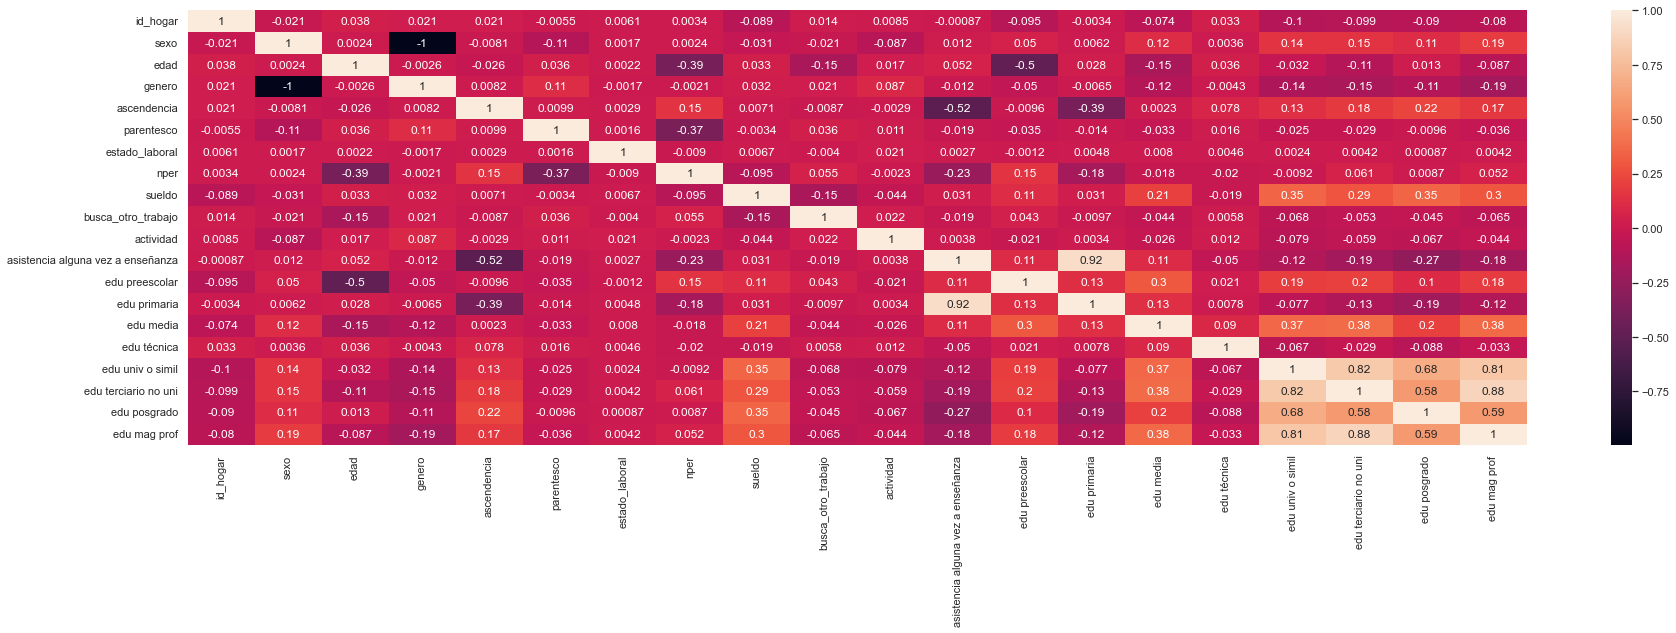

In [8]:
# corr = df.corr()

# sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

In [9]:
df['genero'].value_counts()

6    33003
1    30716
2       13
7        9
5        9
4        4
3        1
Name: genero, dtype: int64

### Ascendencia

In [10]:
asc_princ_porcentage = df['ascendencia'].value_counts() / len(df['ascendencia']) * 100

asc_princ_porcentage

2    69.409458
1    23.507176
0     3.921261
5     1.651635
3     1.496353
4     0.014117
Name: ascendencia, dtype: float64

### Género

In [11]:
df['genero'].value_counts() / len(df['genero']) * 100

6    51.765352
1    48.178182
2     0.020391
7     0.014117
5     0.014117
4     0.006274
3     0.001569
Name: genero, dtype: float64

## Estudio de la composición de los hogares uruguayos

### Cantidad de personas que conforman un grupo familiar

In [12]:
familia = pd.pivot_table(df, index='id_hogar', columns='parentesco',values=['nper'], aggfunc='count')

familia['totales'] = familia.apply(lambda x:x.sum(), axis=1)

familia = familia.sort_values(by='totales', ascending=False)

familia['totales'].value_counts()

1.0    22071
2.0    16336
3.0     2378
4.0      391
5.0       53
6.0        7
7.0        1
Name: totales, dtype: int64

## Organización familiar

In [14]:
df['parentesco_num'] = df['parentesco'].cat.codes

df['parentesco'].value_counts()

6     33461
1     18329
5      4706
3      4438
14      609
2       496
7       455
8       333
4       325
9       214
10      210
12       83
0        48
13       27
11       21
Name: parentesco, dtype: int64

<AxesSubplot:ylabel='sexo'>

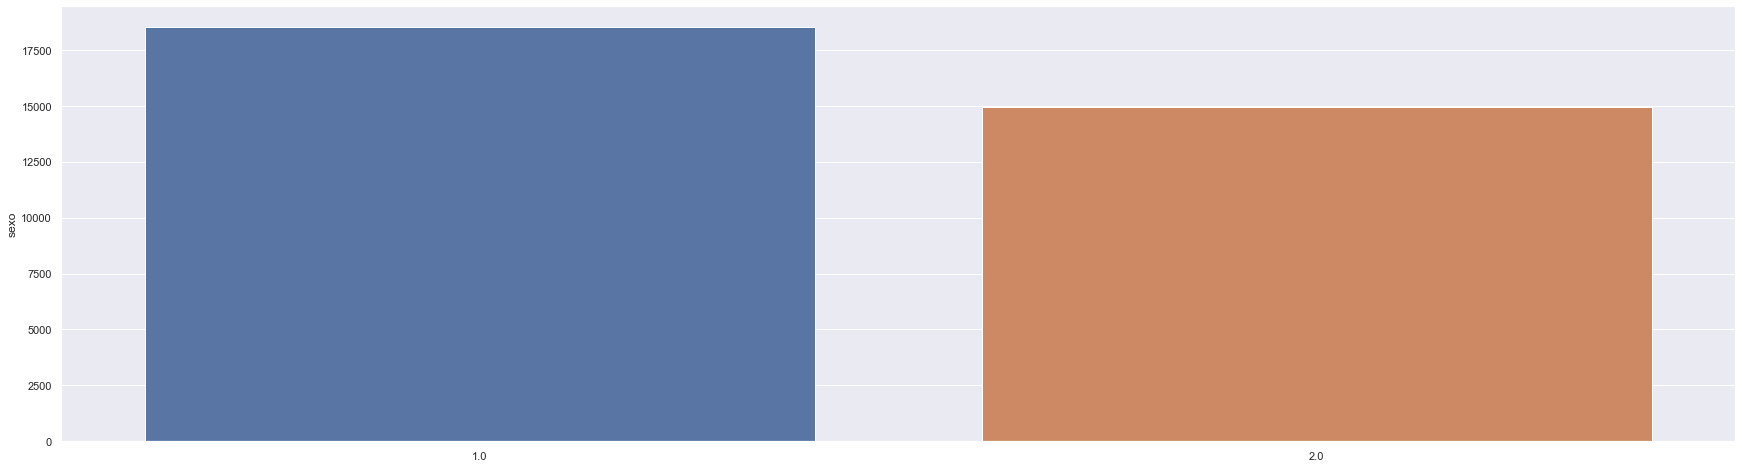

In [20]:
jefes_sexo = df[df['parentesco'].str.contains('Jefe')]['sexo'].value_counts()

sns.barplot(x=jefes_sexo.index, y=jefes_sexo)

Podemos observar que hay una distribución equitativa entre jefes de familia y sexo

## Situación laboral

<AxesSubplot:xlabel='estado_laboral', ylabel='count'>

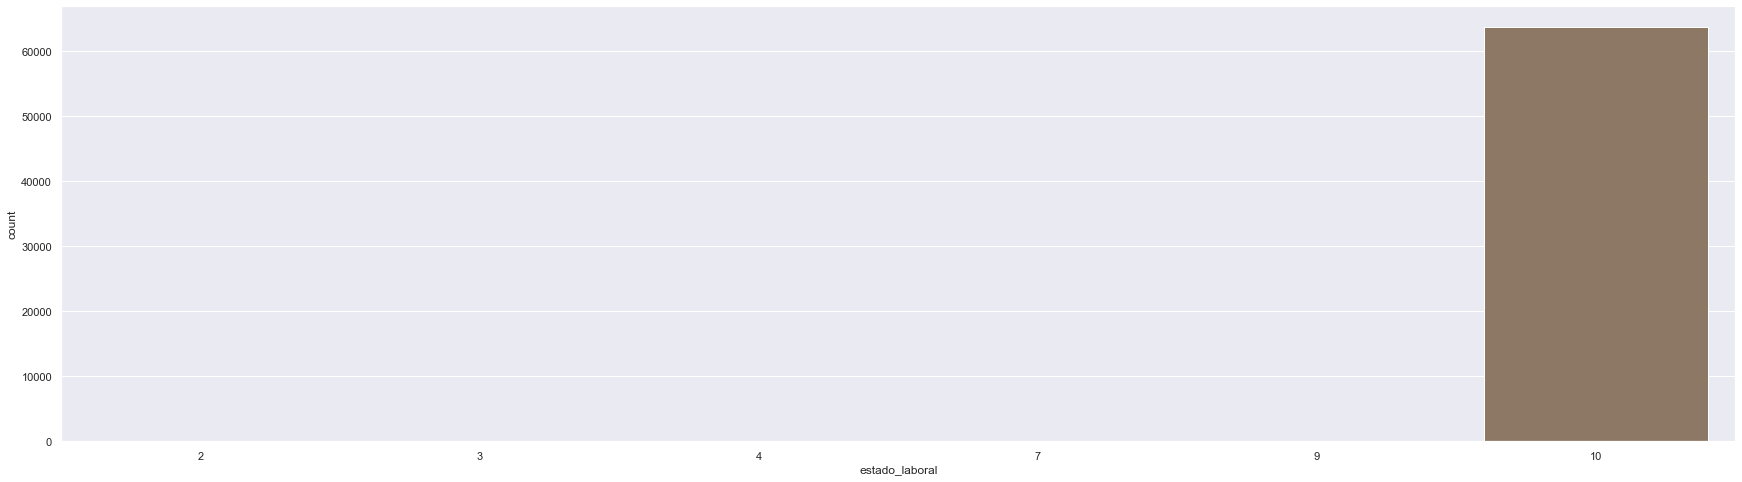

In [21]:
sns.countplot(x=df['estado_laboral'])

In [ ]:
df['estado_laboral'].value_counts() / len(df['estado_laboral']) * 100

In [ ]:
df.groupby(by='estado_laboral').mean()

In [ ]:
df = df[~df['ascendencia'].str.contains('Sin dato')]

sns.boxplot(data=df, x='ascendencia', y='sueldo', hue='sexo')

In [ ]:
sns.lineplot(data=df, x='edad', y='sueldo',hue='sexo')

## Comienzo de análisis más profundo. 

En este punto nos empezamos a centrar en las madres, jefas de hogares.

In [ ]:
mask = df['parentesco_num'].isin([3,5,6])
df = df[mask]

df['es_madre'] = np.NaN
df['es_madre'] = df['es_madre'].apply(lambda x:'madre').where(df['parentesco_num'] == 6).where(df['sexo'] == 2)

### Empezamos a centrarnos en las hogares monomarentales

In [ ]:
# Eliminamos hogares con jefes de hogar masculinos
df_madre_y_familia = df.copy().drop(labels=list(df.loc[(df['sexo'] == 1) & (df['parentesco_num'] == 6)].index))

#Creamos una columna que cuenta la cantidad de hijos por grupo familiar
df_madre_y_familia['hijos'] = df_madre_y_familia.groupby('id_hogar')['id_hogar'].transform('count') - 1

df_madre_y_familia.sample(5)

### Cantidad de hijos

In [ ]:
df_madre_y_familia.where(df['es_madre'].str.contains('madre'))['hijos'].value_counts()

## Investigamos el contexto de las jefas de hogar

In [ ]:
df_moms = df_madre_y_familia.copy()[df_madre_y_familia['es_madre'].notna()]

df_moms.sample(5)

df_moms.to_csv('moms.csv', index=None)

In [ ]:
df_moms['estado_laboral'].value_counts()

In [ ]:
df_moms.groupby(by='estado_laboral').mean()

In [ ]:
sns.displot(df_moms['sueldo'])

### En la gráfica anterior nos enfrentamos a la necesidad de eliminar outliers para realizar un análisis más ajustado a la realidad general de las madres

In [ ]:
moms_sueldos_no_outliers = df_moms[df_moms['estado_laboral'].str.contains('Ocupados')].copy()
moms_sueldos_no_outliers = moms_sueldos_no_outliers[moms_sueldos_no_outliers['edad'] > 14]
moms_sueldos_no_outliers = moms_sueldos_no_outliers[moms_sueldos_no_outliers['sueldo'] > 0]

In [ ]:
quantil_99 = moms_sueldos_no_outliers['sueldo'].quantile(0.99)
print(quantil_99)

moms_sueldos_no_outliers = moms_sueldos_no_outliers[moms_sueldos_no_outliers['sueldo'] < quantil_99]

quartil_1 = moms_sueldos_no_outliers['sueldo'].quantile(0.25)
quartil_3 = moms_sueldos_no_outliers['sueldo'].quantile(0.75)

iqr =  quartil_3 - quartil_1

moms_sueldos_no_outliers = moms_sueldos_no_outliers[moms_sueldos_no_outliers['sueldo'] < quartil_3 + 1.5 * iqr]

moms_sueldos_no_outliers = moms_sueldos_no_outliers[moms_sueldos_no_outliers['sueldo'] > quartil_1 - 1.5 * iqr]

In [ ]:
sns.displot(moms_sueldos_no_outliers['sueldo'])

### Sueldo por cantidad de hijos

In [ ]:
sns.boxplot(data=moms_sueldos_no_outliers, x='hijos', y='sueldo')

plt.show()

In [ ]:
moms_sueldos_no_outliers[['edad', 'sueldo', 'hijos']].describe().transpose()

### Sueldo por ascendencia

In [ ]:
sns.boxplot(data=moms_sueldos_no_outliers, x='ascendencia', y='sueldo')

In [ ]:
moms_sueldos_no_outliers.sample(5)

Tiene trabajo sí o no

label encoding y despues get dummies

variable target no columnas, necesitamos una sola columna. hacer encoding de eso

cross validation - 10 fold - testear que no haya overfitting, separa el dataset en k folds